## Importy

In [9]:
import pandas as pd
import numpy as np
import string
import json
from IPython.display import display
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from emoji import UNICODE_EMOJI
import re
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from  datetime import datetime

pd.options.display.max_columns = None
# Use 'display(df)' instead of 'df' to display all columns.

[nltk_data] Downloading package wordnet to /home/lilatee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lilatee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Ładowanie danych

### US region

In [10]:
df = pd.read_csv("./data/youtube_data/US_videos_5p.csv", sep=';')
df["region"] = "US"
df.rename(columns={"description ": "description"}, inplace=True)
print(df.shape)
shapeOld = df.shape
df.head(1)

(40949, 17)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,NaN,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US


### Sprawdzanie NANów

In [11]:
for col in df.columns:
    temp = df[col].isna()
    print(f"{col}:, {temp.any()} {temp.sum()}")

video_id:, False 0
trending_date:, False 0
title:, False 0
channel_title:, False 0
category_id:, True 38929
publish_time:, False 0
tags:, False 0
views:, False 0
likes:, False 0
dislikes:, False 0
comment_count:, False 0
thumbnail_link:, False 0
comments_disabled:, False 0
ratings_disabled:, False 0
video_error_or_removed:, False 0
description:, True 570
region:, False 0


In [12]:
df["description"] = df["description"].fillna("") 

### Szukanie nienaturalnych wartości


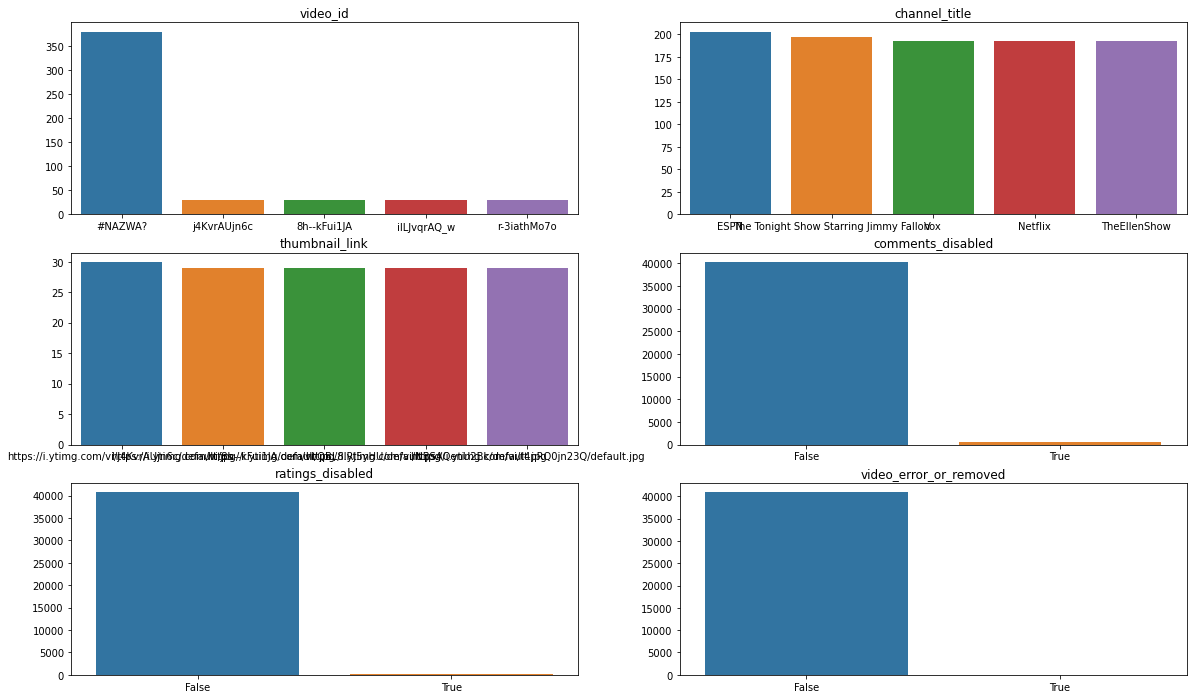

In [13]:
cols_to_check = ["video_id", "channel_title", "thumbnail_link", "comments_disabled", "ratings_disabled", "video_error_or_removed"]

n_of_cols = 2
n_of_rows = int(len(cols_to_check)/n_of_cols)
fig, axes = plt.subplots(n_of_rows, n_of_cols, figsize=(n_of_cols*10, n_of_rows*4))

data = df.loc[:, cols_to_check]
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        ax.set_title(cols_to_check[i*n_of_cols+j])
        dd = df.loc[:, cols_to_check[i*n_of_cols+j]].value_counts()[:5]
        sns.barplot(ax=ax, x=dd.index, y=dd.values)

In [14]:
for col in df.columns:
    print(f"{col}: ", df.loc[df[col] == "#NAZWA?", :].shape)

video_id:  (380, 17)
trending_date:  (0, 17)
title:  (0, 17)
channel_title:  (0, 17)
category_id:  (0, 17)
publish_time:  (0, 17)
tags:  (0, 17)
views:  (0, 17)
likes:  (0, 17)
dislikes:  (0, 17)
comment_count:  (0, 17)
thumbnail_link:  (0, 17)
comments_disabled:  (0, 17)
ratings_disabled:  (0, 17)
video_error_or_removed:  (0, 17)
description:  (0, 17)
region:  (0, 17)


In [15]:
df = df.loc[df.video_id!="#NAZWA?", :]
print(df.shape)

(40569, 17)


## Dodanie nowych kolumn

In [17]:
from prepareCSV import addColumnsAndSaveCSV
# df = addColumnsAndSaveCSV(df, "./US_new_columns.csv")
df = pd.read_csv("./US_new_columns.csv")

In [18]:
df[:3]

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region,pub_date,pub_day_of_the_week,pub_year,pub_month,pub_day,pub_hour,tren_date,tren_day_of_the_week,tren_year,tren_month,tren_day,time_to_trend_in_days,dislikes/likes,likes/views,dislikes/views,comment_count/views,increase_views,increase_likes,increase_dislikes,increase_comms,times_in_trend,avg_views,avg_likes,avg_dislikes,avg_comms,avg_views_increase_per_hour,n_of_tags,title_clean,title_length,title_n_of_words,title_capital_letters,title_capital_letters_percent,title_small_letters,title_small_letters_percent,title_punctuation,title_punctuation_percent,title_n_of_emojis,desc_clean,desc_length,desc_n_of_words,desc_capital_letters,desc_capital_letters_percent,desc_small_letters,desc_small_letters_percent,desc_punctuation,desc_punctuation_percent,desc_list_of_urls,desc_n_of_urls,desc_n_of_emojis,isFacebook,isTwitter,isInstagram
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,NaN,2017-11-13T17:13:01.000Z,"[""SHANtell martin""]",748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US,2017-11-13 17:13:01,0.0,2017.0,11.0,13.0,17.0,2017-11-14 23:59:59,1.0,2017.0,11.0,14.0,1.282616,0.051558,0.076869,0.003963,0.021318,1440216.0,30572.0,4184.0,8271.0,7.0,2.174423e+06,87968.428571,7001.714286,21342.285714,5.834748e+05,1,want talk marriage,34,7,28,0.823529,0,0.000000,0,0.000000,0,shantells channel httpswwwyoutubecomshantellma...,1379,159,248,0.179840,797,0.577955,36,0.110950,"[""https://www.youtube.com/shantellmartin"", ""ht...",23,0,True,True,True
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,NaN,2017-11-13T07:30:00.000Z,"[""last week tonight trump presidency"", ""last w...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US,2017-11-13 07:30:00,0.0,2017.0,11.0,13.0,7.0,2017-11-14 23:59:59,1.0,2017.0,11.0,14.0,1.687488,0.063240,0.040179,0.002541,0.005252,2213233.0,34599.0,3746.0,5581.0,7.0,5.027629e+06,136365.571429,10166.285714,18159.000000,1.433363e+06,4,trump presidency last week tonight john oliver...,62,10,11,0.177419,39,0.629032,3,0.048387,0,one year presidential election john oliver dis...,615,85,34,0.055285,466,0.757724,15,0.050407,"[""http://Facebook.com/LastWeekTonight"", ""http:...",3,0,True,True,False
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,NaN,2017-11-12T19:05:24.000Z,"[""racist superman"", ""rudy"", ""mancuso"", ""king"",...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ SUBSCRIBE ► https:/...,US,2017-11-12 19:05:24,6.0,2017.0,11.0,12.0,19.0,2017-11-14 23:59:59,1.0,2017.0,11.0,14.0,2.204572,0.036560,0.045758,0.001673,0.002563,1135250.0,21663.0,1391.0,1084.0,7.0,4.607968e+06,173410.571429,6790.142857,9427.857143,1.447644e+06,23,racist superman rudy mancuso king bach lele pons,53,10,8,0.150943,33,0.622642,3,0.056604,0,watch previous video ▶ subscribe ► httpswwwyou...,1133,104,137,0.120918,686,0.605472,90,0.177405,"[""https://www.youtube.com/channel/UC5jkXpfnBhl...",19,1,True,True,True


## Wizualizacja ciekawszych danych

In [19]:
print("Shape przed scaleniem filmmów i dodaniem kolumn:", shapeOld)
print("Shape po scaleniu filmów i dodaniu kolumn:", df.shape)

Shape przed scaleniem filmmów i dodaniem kolumn: (40949, 17)
Shape po scaleniu filmów i dodaniu kolumn: (6283, 70)


### Zakres czasu

In [20]:
tren_start = datetime.strptime(df["tren_date"].min(), '%Y-%m-%d %H:%M:%S')
tren_end = datetime.strptime(df["tren_date"].max(), '%Y-%m-%d %H:%M:%S')
print("Początek trending_date: ", tren_start)
print("Koniec trending_date: ", tren_end)
print("Zakres: ", tren_end-tren_start)
print("="*100)

pub_start = datetime.strptime(df["pub_date"].min(), '%Y-%m-%d %H:%M:%S')
pub_end = datetime.strptime(df["pub_date"].max(), '%Y-%m-%d %H:%M:%S')
print("Początek publish_date: ", pub_start)
print("Koniec publish_date: ", pub_end)
print("Zakres: ", pub_end-pub_start)


Początek trending_date:  2017-11-14 23:59:59
Koniec trending_date:  2018-06-14 23:59:59
Zakres:  212 days, 0:00:00
Początek publish_date:  2006-07-23 08:24:11
Koniec publish_date:  2018-06-14 01:31:53
Zakres:  4343 days, 17:07:42


### Liczba filmów miesiącami

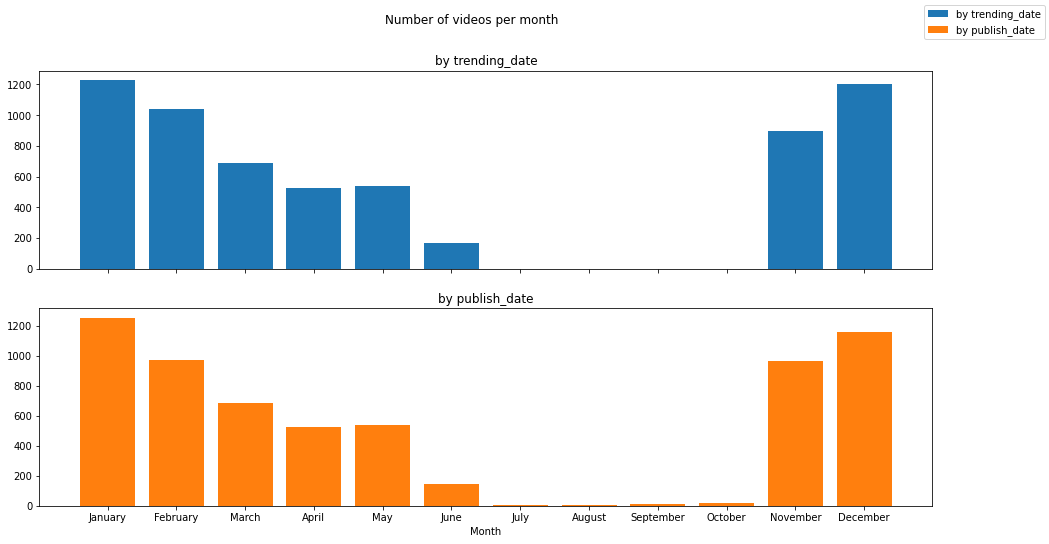

In [21]:
print("\n")
months_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 8), sharex=True)
fig.suptitle("Number of videos per month")

data = df['tren_month'].value_counts(sort=False).sort_index()
months = data.keys()
ax1.set_title("by trending_date")
ax1.bar(months, data, color='tab:blue', label="by trending_date")


data = df['pub_month'].value_counts(sort=False).sort_index()
months = data.keys()
ax2.set_title("by publish_date")
ax2.bar(months, data, color='tab:orange', label="by publish_date")
ax2.set_xlabel ('Month')

    
# fig.text(0.04, 0.5, 'Number of videos', va='center', rotation='vertical')
fig.legend()
plt.xticks(ticks=np.arange(1, 13, 1), labels=months_labels)
plt.show()

### Różne statystyki liczbowe

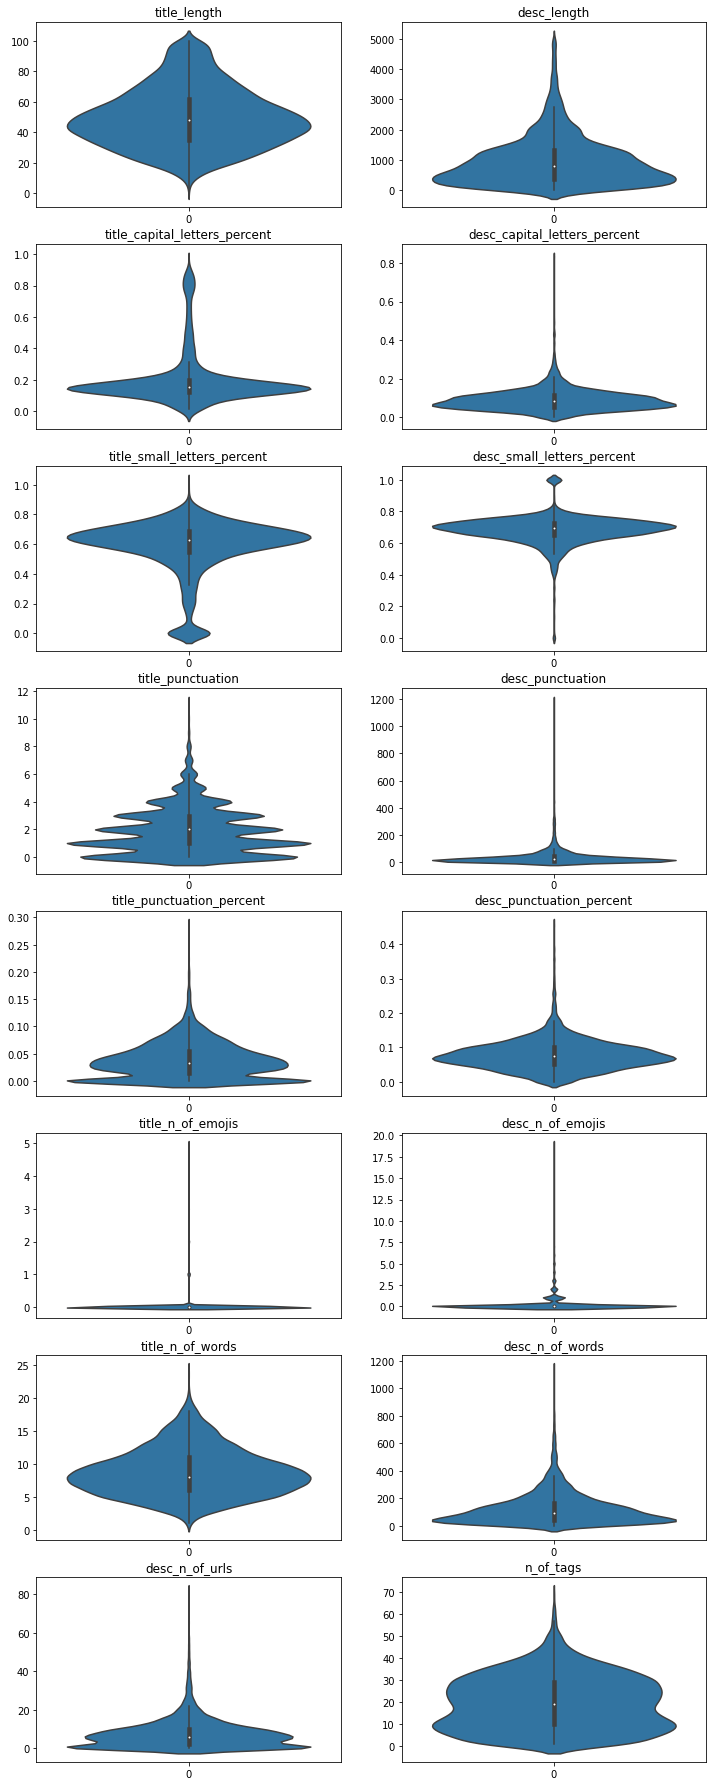

In [22]:
list_of_columns = [
    "title_length", "desc_length", 
#     "title_capital_letters", "desc_capital_letters", 
    "title_capital_letters_percent", "desc_capital_letters_percent", 
#     "title_small_letters", "desc_small_letters", 
    "title_small_letters_percent",  "desc_small_letters_percent", 
    "title_punctuation", "desc_punctuation",
    "title_punctuation_percent", "desc_punctuation_percent",
    "title_n_of_emojis", "desc_n_of_emojis",
    "title_n_of_words", "desc_n_of_words",
    "desc_n_of_urls",  "n_of_tags",
#     "likes", "dislikes",
#     "views", "comment_count"
                  ]
n_of_cols = 2
n_of_rows = int(len(list_of_columns)/n_of_cols)
fig, axes = plt.subplots(n_of_rows, n_of_cols, figsize=(n_of_cols*6, n_of_rows*4))

data = df.loc[:, list_of_columns]
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        ax.set_title(list_of_columns[i*n_of_cols+j])
        sns.violinplot(ax=ax,data=df.loc[:, list_of_columns[i*n_of_cols+j]])

### Statystyki umieszczania linków do kont społecznościowych

<AxesSubplot:title={'center':'Instagram'}, xlabel='isInstagram', ylabel='count'>

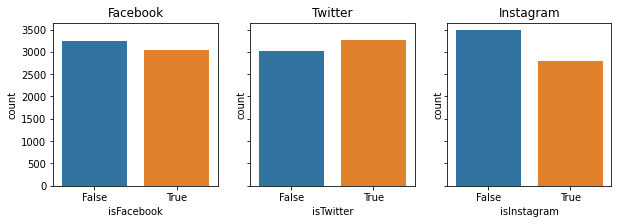

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True)

axes[0].set_title("Facebook")
sns.countplot(ax=axes[0], x="isFacebook", data=df)

axes[1].set_title("Twitter")
sns.countplot(ax=axes[1], x="isTwitter", data=df)

axes[2].set_title("Instagram")
sns.countplot(ax=axes[2], x="isInstagram", data=df)

### 20 najpopularniejszych słów w tagach

Text(0.5, 1.0, 'Najpopularniejsze tagi')

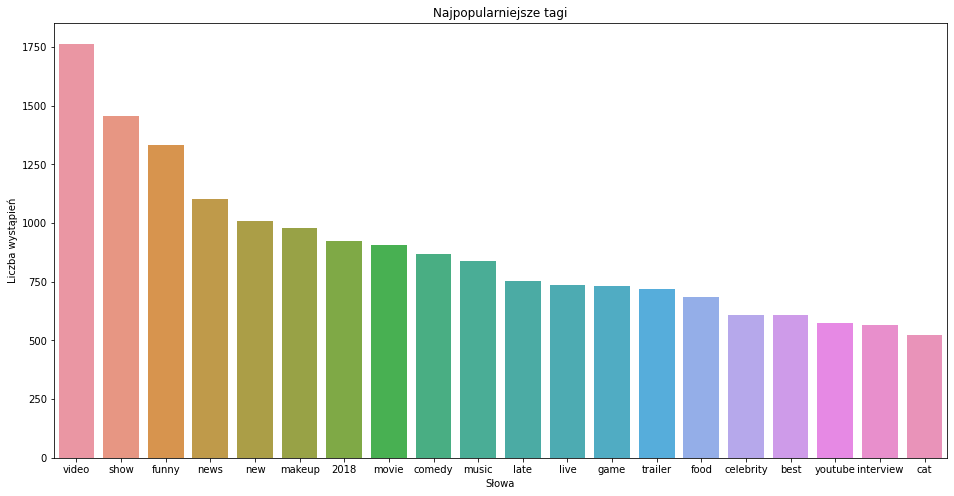

In [24]:
all_tags_words = []
for tags in df.loc[:,"tags"]:
    tags = json.loads(tags.lower())
    single_words = ' '.join(tags).split(' ')
    all_tags_words.extend(single_words)
    
all_words_without_stopwords = [word for word in all_tags_words if word not in stopwords.words('english')]

wnl = WordNetLemmatizer()
all_words_lemmatized = [wnl.lemmatize(word) for word in all_words_without_stopwords]


cnt_tags = Counter(all_words_lemmatized)
cnt_tags = cnt_tags.most_common()

xx, yy = zip(*cnt_tags[:20])
plt.figure(figsize=(16,8))
sns.barplot(x=list(xx),y=list(yy))
plt.xlabel("Słowa")
plt.ylabel("Liczba wystąpień")
plt.title("Najpopularniejsze tagi")

### 20 najpopularniejszych słów w tytułach

Text(0.5, 1.0, 'Najpopularniejsze słowa w tytułach')

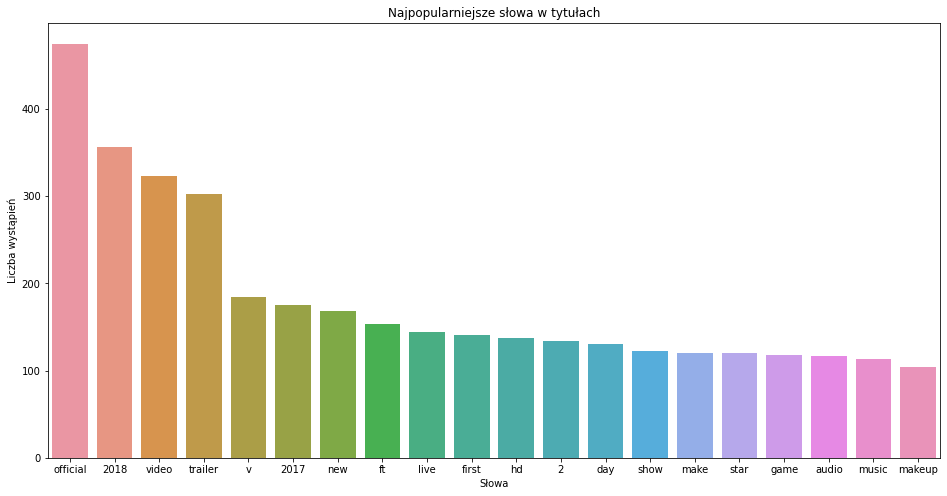

In [25]:
all_words_title = []
for title in df.loc[:,"title_clean"]:
    single_words = str(title).split(' ')
    all_words_title.extend(single_words)
    
cnt_title = Counter(all_words_title)
cnt_title = cnt_title.most_common()

xx, yy = zip(*cnt_title[:20])
plt.figure(figsize=(16,8))
sns.barplot(x=list(xx),y=list(yy))
plt.xlabel("Słowa")
plt.ylabel("Liczba wystąpień")
plt.title("Najpopularniejsze słowa w tytułach")

### Opis podstawowych statystyk dla filmów.
#### W statystyce znajdują się tylko pierwsze wystapienia filmu w liście trending 

,views,likes,dislikes,comment_count
count,6.283000e+03,6.283000e+03,6283.000000,6283.000000
mean,7.521188e+05,3.449781e+04,1428.354926,4515.251791
std,1.839221e+06,1.165042e+05,12126.330315,21562.592817
min,5.490000e+02,1.000000e+00,1.000000,1.000000
25%,8.345600e+04,1.910500e+03,72.000000,260.500000
50%,2.717800e+05,7.999000e+03,242.000000,918.000000
75%,7.533370e+05,2.519050e+04,766.500000,2851.000000
max,3.934993e+07,3.880071e+06,629120.000000,733373.000000


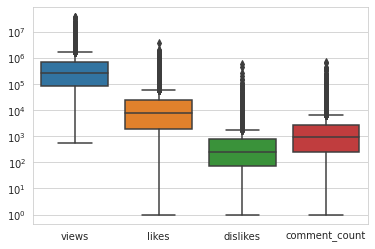

In [26]:
display(df.describe()[['views','likes','dislikes','comment_count']])

sns.set_style("whitegrid")
data = df[['views','likes','dislikes','comment_count']]
ax = sns.boxplot(data=data)
ax.set(yscale="log")
plt.show()

### Proporcje podstawowych statystyk.
#### W statystyce znajdują się tylko pierwsze wystapienia filmu w liście trending 

,dislikes/likes,likes/views,dislikes/views,comment_count/views
count,6283.000000,6.283000e+03,6.283000e+03,6.283000e+03
mean,0.119293,4.033598e-02,1.728174e-03,5.651228e-03
std,0.609499,3.498061e-02,4.464594e-03,6.947264e-03
min,0.000576,4.779704e-08,4.779704e-08,4.779704e-08
25%,0.014868,1.437897e-02,5.234666e-04,1.879219e-03
50%,0.030989,3.137292e-02,9.146719e-04,3.745318e-03
75%,0.074694,5.560537e-02,1.666882e-03,6.800688e-03
max,24.048462,2.904665e-01,1.915315e-01,1.176430e-01


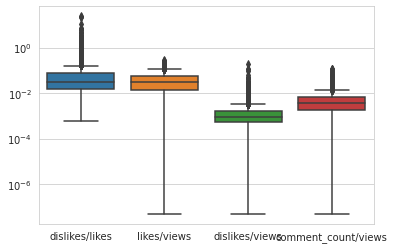

In [27]:
display(df.describe()[['dislikes/likes','likes/views','dislikes/views','comment_count/views']])

sns.set_style("whitegrid")
data = df[['dislikes/likes','likes/views','dislikes/views','comment_count/views']]
ax = sns.boxplot( data=data)
ax.set(yscale="log")
plt.show()

### Wzrost podstawowych statysyk po pierwszym wystąpieniu w trending 
#### Rozważamy filmy  które wystąpiły ponownie w trending

,increase_views,increase_likes,increase_dislikes,increase_comms
count,6.283000e+03,6283.000000,6283.000000,6283.000000
mean,3.303712e+05,7909.061913,664.243514,939.973580
std,1.086940e+06,30962.341637,8073.043704,6891.513656
min,-2.297850e+05,-23896.000000,-5734.000000,-3993.000000
25%,9.913500e+03,109.500000,6.000000,8.000000
50%,7.130600e+04,1115.000000,68.000000,114.000000
75%,2.493520e+05,4603.500000,297.000000,512.500000
max,2.782957e+07,867257.000000,436652.000000,326278.000000


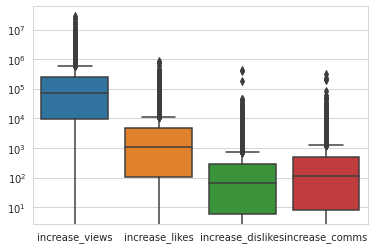

In [28]:
sns.set_style("whitegrid")
display(df.describe()[['increase_views','increase_likes','increase_dislikes','increase_comms']])

data = df[['increase_views','increase_likes','increase_dislikes','increase_comms']]
ax = sns.boxplot( data=data)
ax.set(yscale="log")
plt.show()


### Czas od publikacji do pierwszego wystąpienia w trending


,time_to_trend_in_days
count,6283.000000
mean,23.163097
std,211.088284
min,0.458275
25%,1.457535
50%,2.104144
75%,3.115492
max,4215.649861


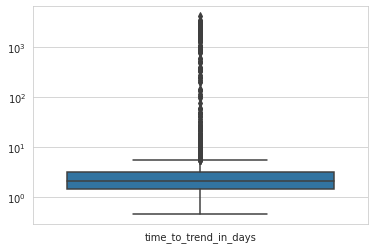

In [29]:
display(df.describe()[['time_to_trend_in_days']])

sns.set_style("whitegrid")
data = df[['time_to_trend_in_days']]
ax = sns.boxplot( data=data)
ax.set(yscale="log")
plt.show()

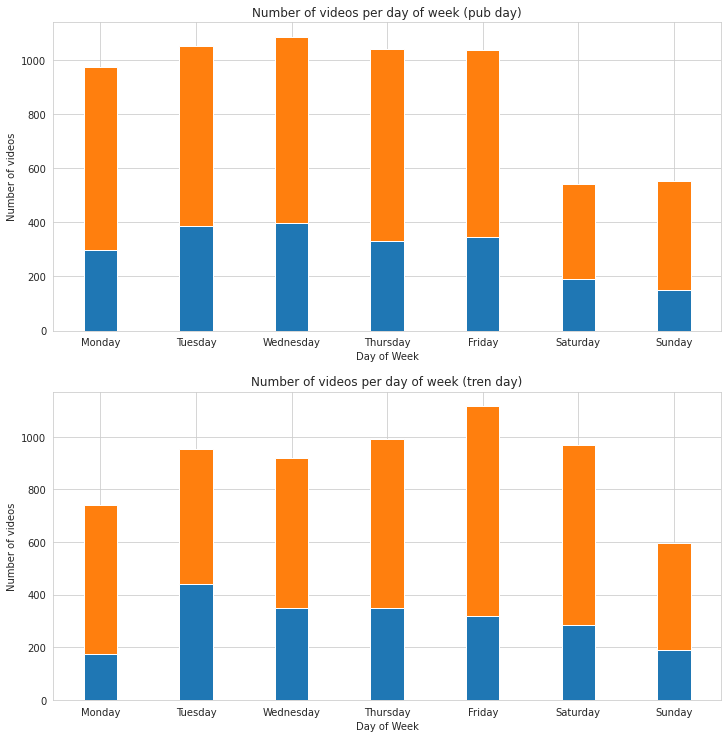

In [30]:
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

data17 = df[df["tren_year"]==2017]['pub_day_of_the_week'].value_counts(sort=False)[df["pub_day_of_the_week"].unique()]
data18 = df[df["tren_year"]==2018]['pub_day_of_the_week'].value_counts(sort=False)[df["pub_day_of_the_week"].unique()]

days = data17.keys()#[0,6,4,5,3,1,2]


fig, ax = plt.subplots(2,1,figsize=(10,10))
fig.tight_layout(h_pad=4)
ax[0].bar(days,data17,0.35,label="2017")
ax[0].bar(days,data18,0.35,bottom=data17,label="2018")
ax[0].set_xlabel ('Day of Week')
ax[0].set_ylabel ('Number of videos')
ax[0].set_title("Number of videos per day of week (pub day)")
ax[0].set_xticks([0,1,2,3,4,5,6])
ax[0].set_xticklabels(labels)

data17 = df[df["tren_year"]==2017]['tren_day_of_the_week'].value_counts(sort=False)[df["tren_day_of_the_week"].unique()]
data18 = df[df["tren_year"]==2018]['tren_day_of_the_week'].value_counts(sort=False)[df["tren_day_of_the_week"].unique()]

days = data17.keys()

ax[1].bar(days,data17,0.35,label="2017")
ax[1].bar(days,data18,0.35,bottom=data17,label="2018")
ax[1].set_xlabel ('Day of Week')
ax[1].set_ylabel ('Number of videos')
ax[1].set_title("Number of videos per day of week (tren day)")
ax[1].set_xticks([0,1,2,3,4,5,6])
ax[1].set_xticklabels(labels)
plt.show()